# Task

In [1]:
# import
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Task 1: Exploratory Data Analysis (EDA):
    1.Load the dataset and perform basic data exploration.
    2.Examine the distribution of features using histograms,box plots,or density plots.
    3.Investigate correlations between features to understand relationships within the data.


In [2]:
# Load the dataset
df = pd.read_csv(r"F:\Drive\ExcelR\Assignments\PCA\PCA\wine.csv")
df.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [8]:
# Basic statistics of the dataset
df.describe()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [9]:
# Checking for missing values
df.isnull().sum()

Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

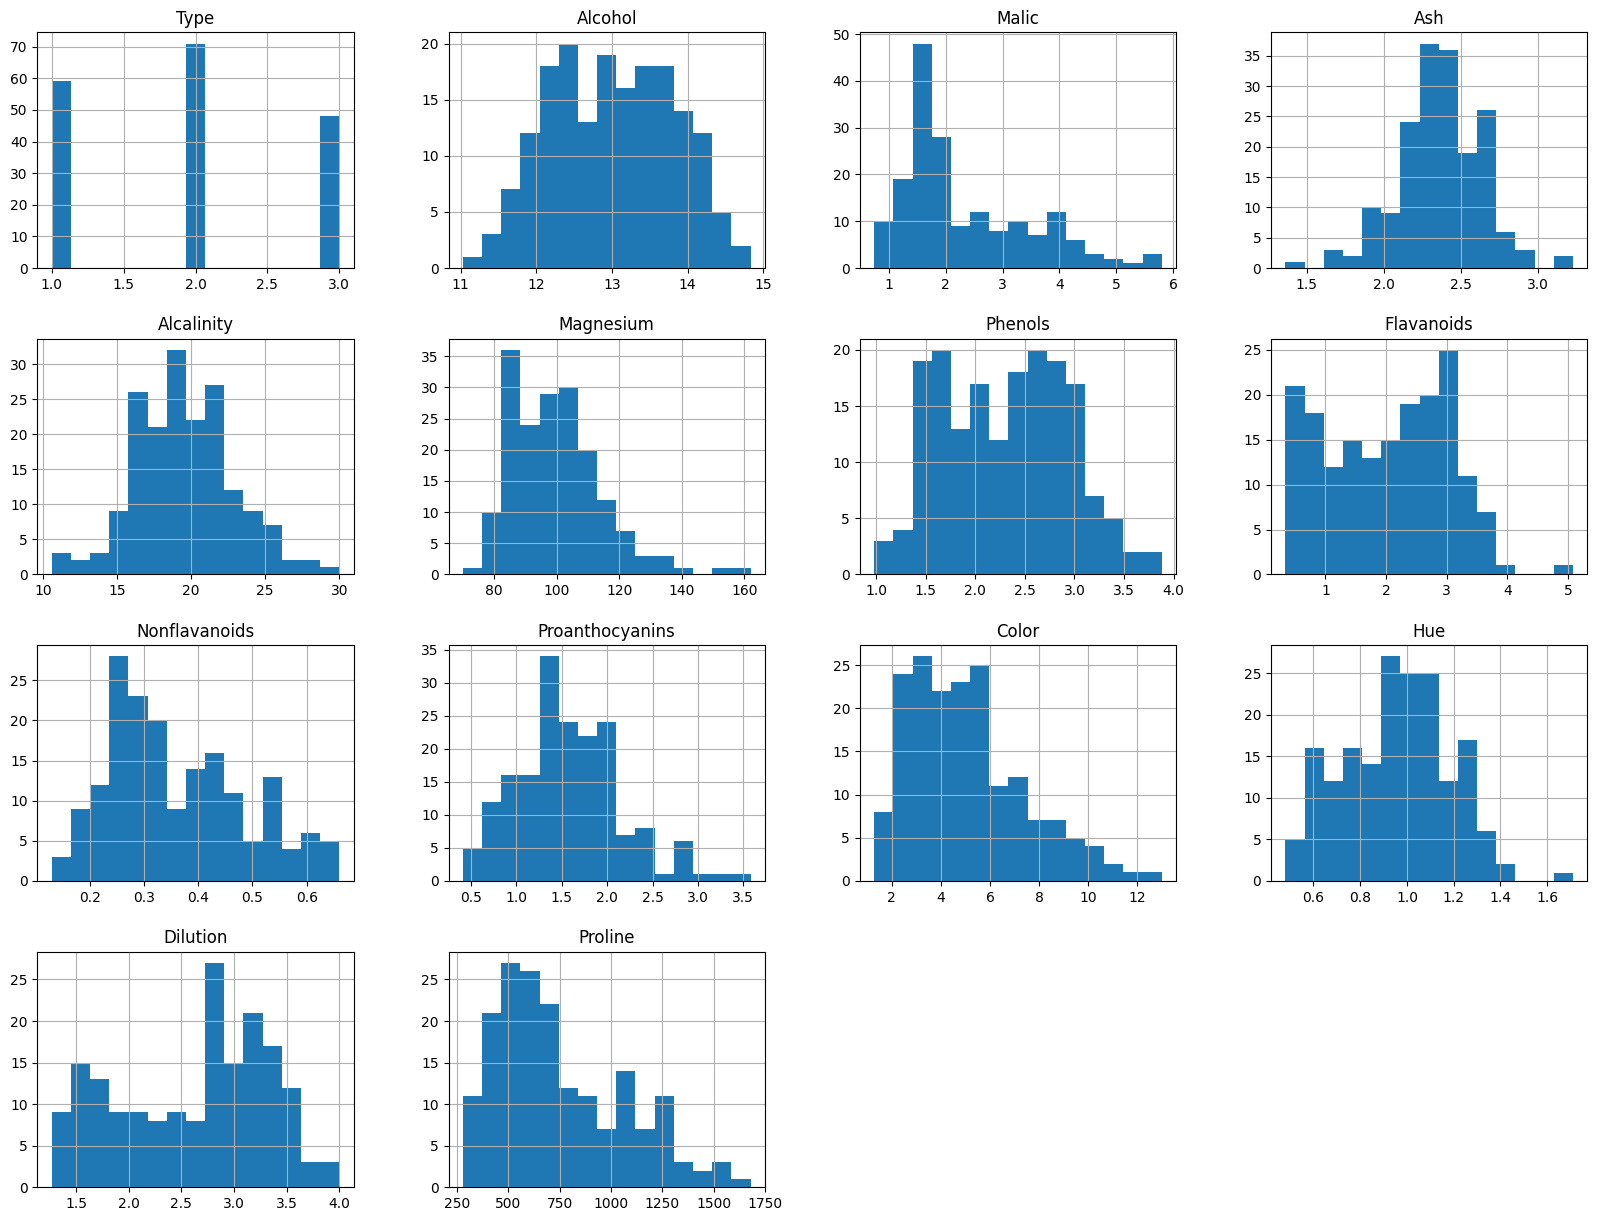

In [10]:
# Histograms for each feature
df.hist(bins=15, figsize=(20, 15))
plt.show()

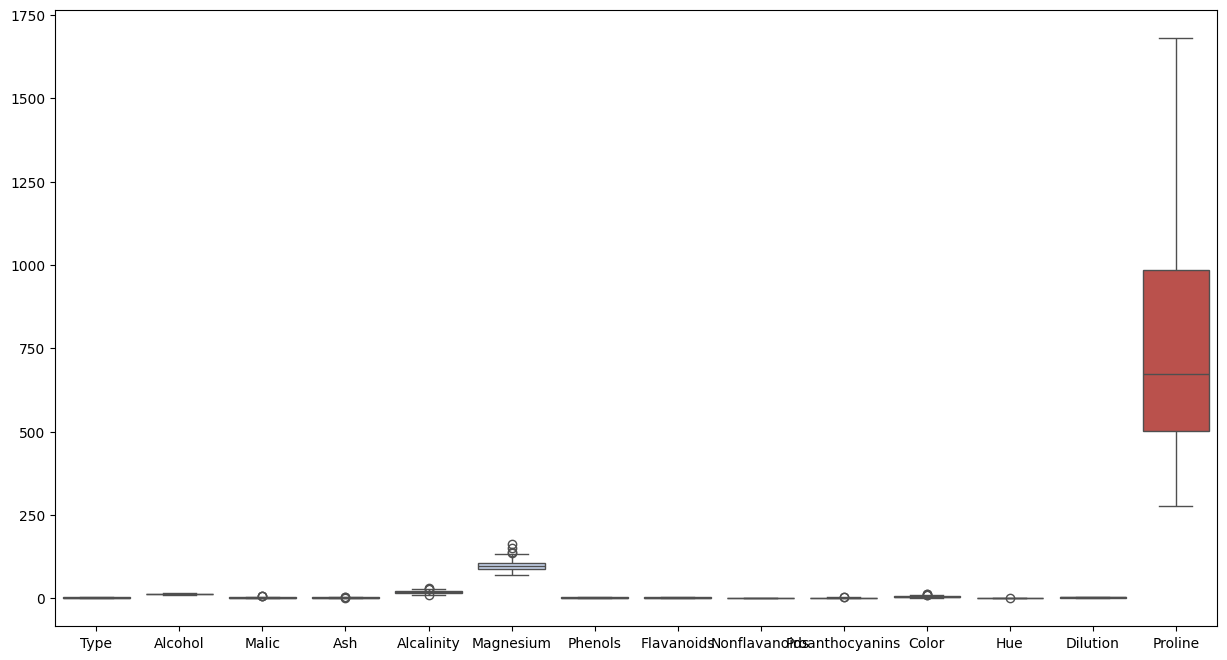

In [31]:
plt.figure(figsize=(15, 8))
sns.boxplot(data=df, palette="coolwarm")
plt.show()

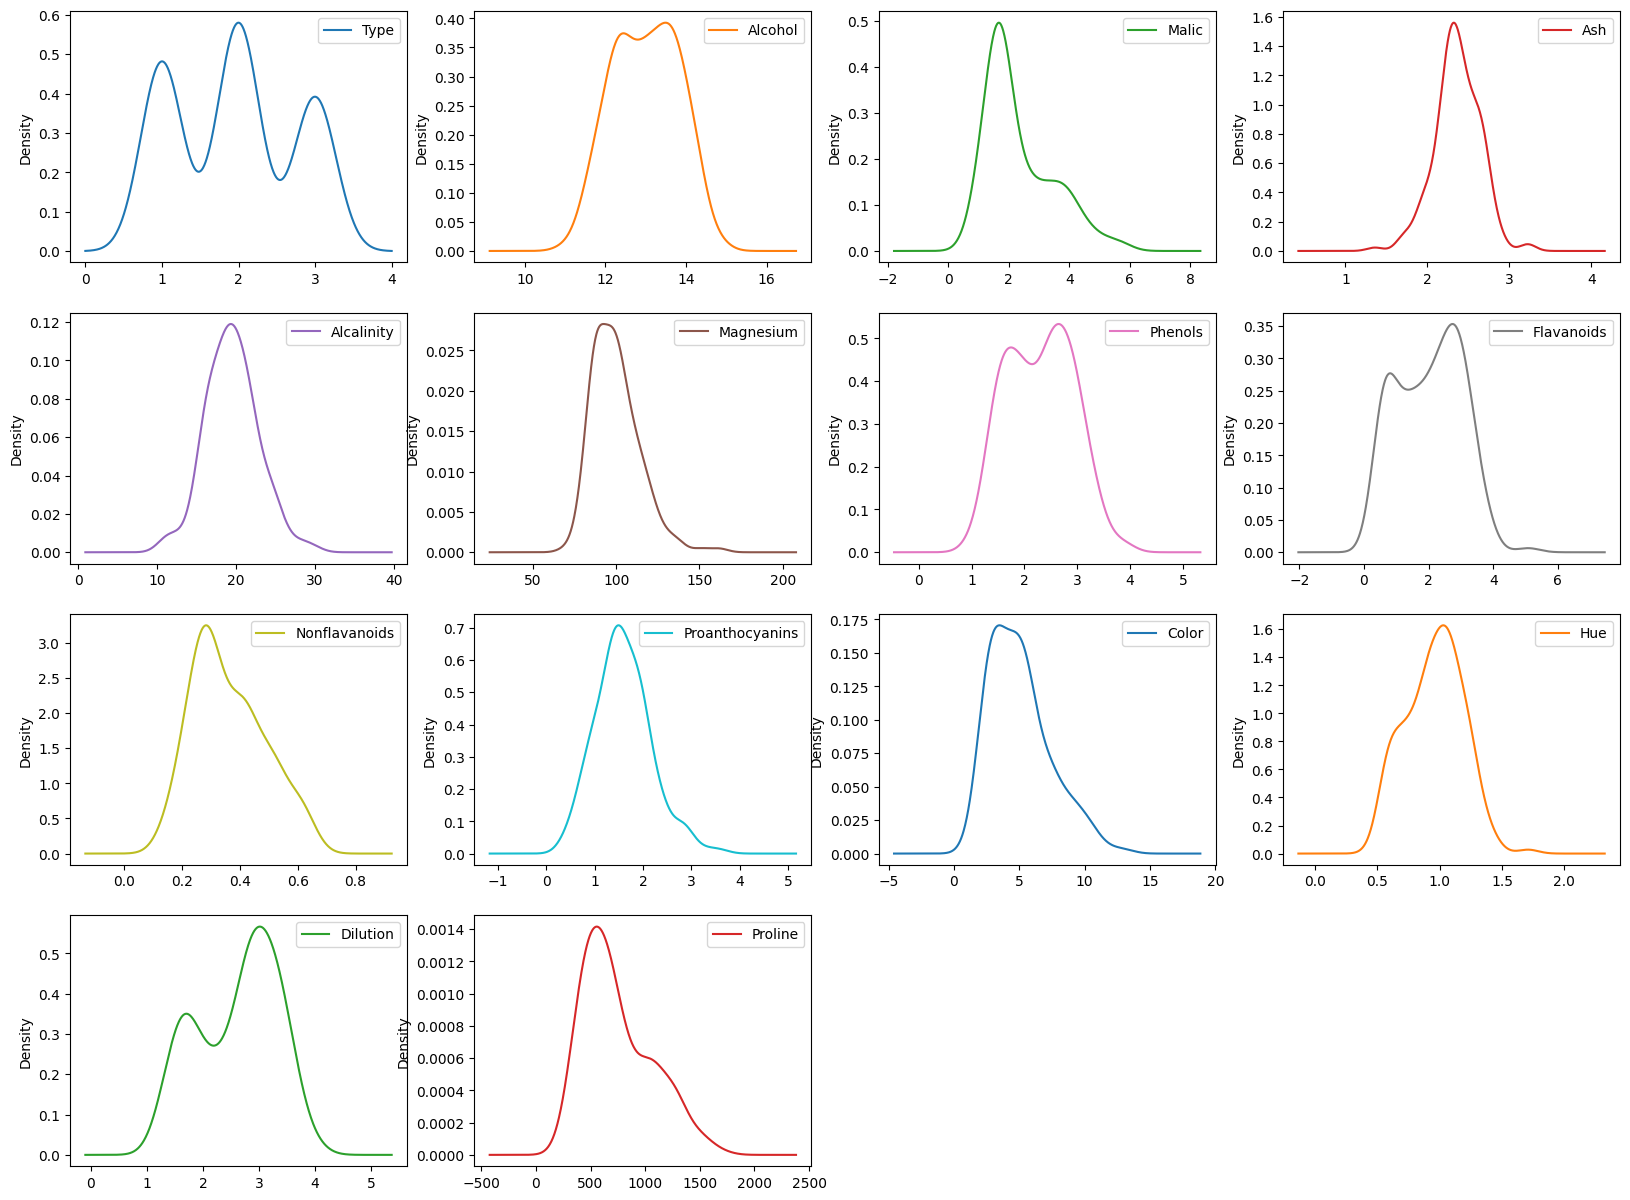

In [29]:
# Density plots for each feature
df.plot(kind='density', subplots=True, layout=(4,4), sharex=False, figsize=(20, 15))
plt.show()

In [32]:
# Compute the correlation matrix
corr_matrix = df.corr()

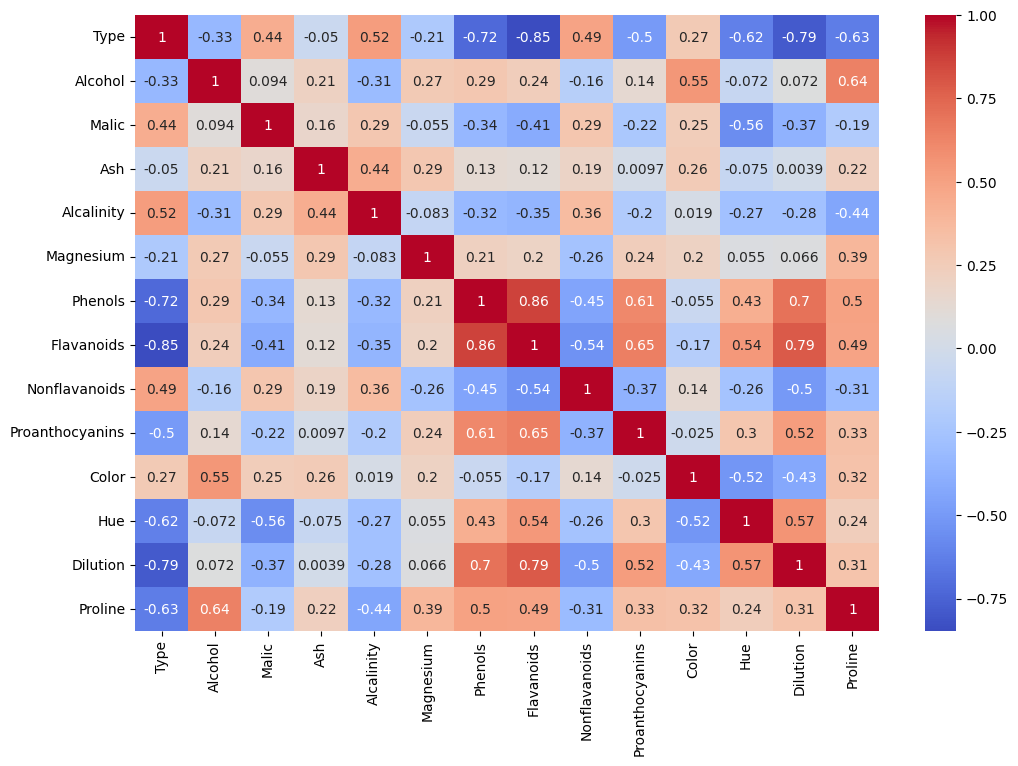

In [33]:
# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

# Task 2: Dimensionality Reduction with PCA:
    1.	Standardize the features to ensure they have a mean of 0 and a standard deviation of Implement PCA to reduce the dimensionality of the dataset.
    2.	Determine the optimal number of principal components using techniques like scree plot or cumulative explained variance.
    3.	Transform the original dataset into the principal components.


In [19]:
# Standardizing the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df.drop(columns='Type'))

In [21]:
# Convert the scaled data back into a DataFrame
scaled_df = pd.DataFrame(scaled_data, columns=df.drop(columns='Type').columns)
scaled_df.head()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,Cluster
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009,1.208322
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242,1.208322
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148,1.208322
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574,1.208322
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874,1.208322


In [22]:
# Apply PCA
pca = PCA()
pca.fit(scaled_df)

PCA()

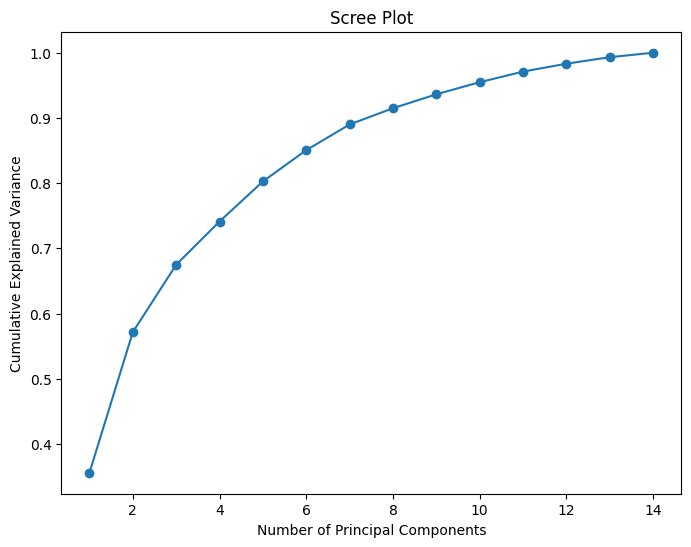

In [24]:
# Scree plot to determine the optimal number of components
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(df.columns)-1+1), pca.explained_variance_ratio_.cumsum(), marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot')
plt.show()

In [39]:
# Select the number of components that explain
pca = PCA(n_components=0.95)
pca_data = pca.fit_transform(scaled_df)

In [40]:
# Display the transformed data
pd.DataFrame(pca_data).head()

,0,1,2,3,4,5,6,7,8,9
0,3.675987,1.000484,-0.126356,-0.083644,0.747994,0.182309,0.579160,-0.051694,0.491470,1.023388
1,2.415492,-0.258973,-2.058443,-0.429236,-0.331319,1.013259,0.034098,-1.039190,-0.359012,0.110385
2,2.850107,0.787883,1.005156,0.714720,-0.309127,-0.459674,0.455550,0.305507,-1.217261,-0.167831
3,4.258415,2.053787,-0.089659,0.708304,-0.228060,-0.392674,-0.409589,-0.616550,0.218466,0.094048
4,1.394605,1.001607,2.023702,-0.442070,0.278387,0.503436,0.439115,-0.416820,0.272482,0.046290


# Task 3: Clustering with Original Data:
    1.	Apply a clustering algorithm (e.g., K-means) to the original dataset.
    2.	Visualize the clustering results using appropriate plots.
    3.	Evaluate the clustering performance using metrics such as silhouette score or Davies–Bouldin index.


In [41]:
# Apply K-means clustering on original data
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled_df)

In [42]:
# Add cluster labels to the original data
df['Cluster'] = clusters

In [43]:
# Evaluate clustering performance using silhouette score
silhouette_avg = silhouette_score(scaled_df, clusters)
print(f'Silhouette Score (Original Data): {silhouette_avg}')

Silhouette Score (Original Data): 0.3312194408364525


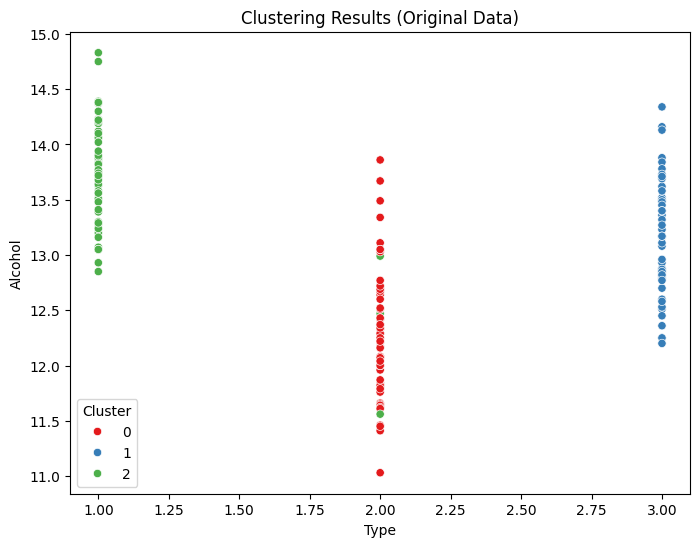

In [44]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df.iloc[:, 0], y=df.iloc[:, 1], hue='Cluster', data=df, palette='Set1')
plt.title('Clustering Results (Original Data)')
plt.show()

# Task 4: Clustering with PCA Data:
    1.	Apply the same clustering algorithm to the PCA-transformed dataset.
    2.	Visualize the clustering results obtained from PCA-transformed data.
    3.	Compare the clustering results from PCA-transformed data with those from the original dataset.


In [45]:
# Apply K-means clustering on PCA data
pca_kmeans = KMeans(n_clusters=3, random_state=42)
pca_clusters = pca_kmeans.fit_predict(pca_data)

In [46]:
# Evaluate clustering performance using silhouette score
pca_silhouette_avg = silhouette_score(pca_data, pca_clusters)
print(f'Silhouette Score (PCA Data): {pca_silhouette_avg}')

Silhouette Score (PCA Data): 0.3483610430403766


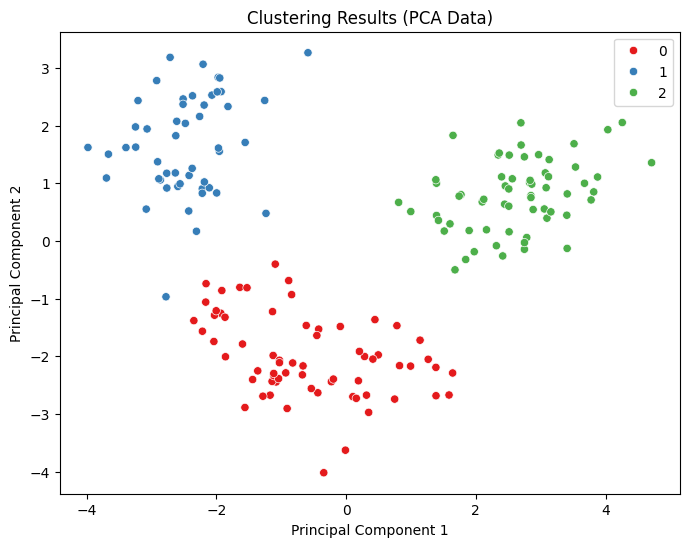

In [47]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], hue=pca_clusters, palette='Set1')
plt.title('Clustering Results (PCA Data)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [48]:
# Perform hierarchical clustering 
linked = linkage(pca_data, method='ward')

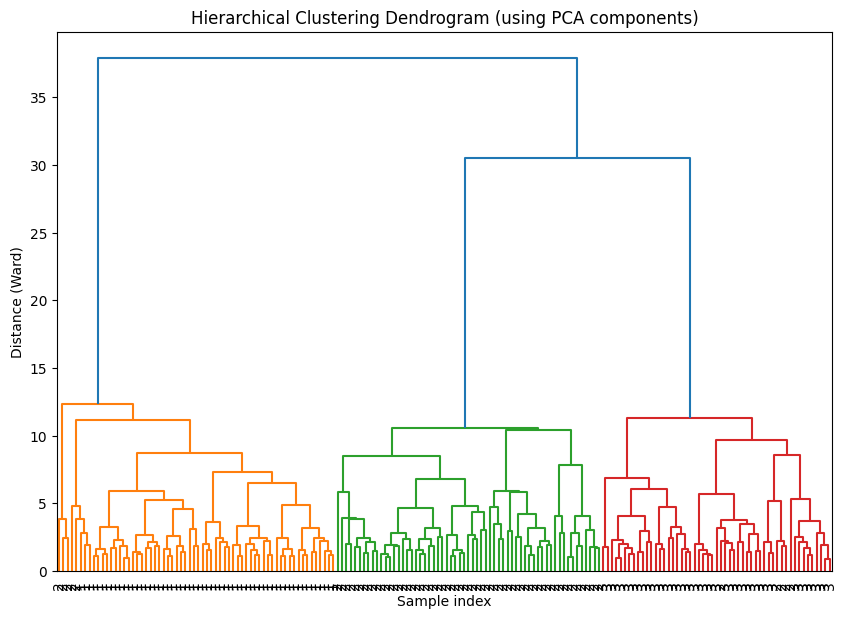

In [49]:
# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked, labels=df['Type'].values, leaf_rotation=90, leaf_font_size=10)
plt.title('Hierarchical Clustering Dendrogram (using PCA components)')
plt.xlabel('Sample index')
plt.ylabel('Distance (Ward)')
plt.show()

# Task 5: Comparison and Analysis:
    1.	Compare the clustering results obtained from the original dataset and PCA-transformed data.
    2.	Discuss any similarities or differences observed in the clustering results.
    3.	Reflect on the impact of dimensionality reduction on clustering performance.
    4.	Analyze the trade-offs between using PCA and clustering directly on the original dataset.


In [50]:
# Compare the Silhouette Scores
print(f'Original Data Silhouette Score: {silhouette_avg}')
print(f'PCA Data Silhouette Score: {pca_silhouette_avg}')

Original Data Silhouette Score: 0.3312194408364525
PCA Data Silhouette Score: 0.3483610430403766


#### 2.Discuss any similarities or differences observed in the clustering results

After applying K-means clustering to both the original dataset and the PCA-transformed dataset, we can observe the following similarities and differences:

- **Cluster Assignments:**
  - **Similarity:** Both approaches aimed to partition the data into distinct clusters based on inherent patterns.
  - **Difference:** The specific data points assigned to each cluster may differ due to the transformation applied by PCA. PCA focuses on the components that capture the most variance, which can shift the data structure and influence cluster boundaries.



**Cluster Separation**:
- **Original Data:** The clusters in the original data may overlap more if there is multicollinearity or noise in the dataset.
- **PCA Data:** Clusters in the PCA-transformed data might be more distinct, as PCA reduces the data to principal components, which typically helps in highlighting the main structure of the data.


In [51]:
# Compare the cluster assignments between the original and PCA data
assignment_comparison = pd.DataFrame({
    'Original_Cluster': clusters,
    'PCA_Cluster': pca_clusters
})

In [52]:
# Display comparison for first few entries
assignment_comparison.head(10)

,Original_Cluster,PCA_Cluster
0,2,2
1,2,2
2,2,2
3,2,2
4,2,2
5,2,2
6,2,2
7,2,2
8,2,2
9,2,2


#### 3. Reflect on the Impact of Dimensionality Reduction on Clustering Performance

Dimensionality reduction through PCA can have a significant impact on clustering performance:

- **Improved Cluster Separation:** By reducing noise and focusing on the most important variance in the data, PCA often leads to better-defined clusters.
- **Reduction in Overfitting:** Fewer dimensions can prevent the clustering algorithm from overfitting, especially in cases where the original dataset contains redundant or irrelevant features.
- **Potential Loss of Information:** PCA involves a trade-off where some information might be lost if too few components are retained, which can lead to less accurate clustering results if critical variance is discarded.

#### 4. Analyze the Trade-offs Between Using PCA and Clustering Directly on the Original Dataset

When deciding whether to use PCA before clustering or to cluster directly on the original dataset, several trade-offs must be considered:

- **PCA Advantages:**

    - **Dimensionality Reduction:** Reduces computational complexity, especially for datasets with a large number of features.
    - **Noise Reduction:** PCA can filter out noise by focusing on the principal components that capture the most significant variance, leading to more robust clustering.
    - **Improved Visualization:** When reduced to 2 or 3 principal components, PCA makes it easier to visualize data and the resulting clusters.

- **PCA Disadvantages:**

    - **Loss of Interpretability:** The principal components are linear combinations of the original features, which can make the clusters harder to interpret in terms of the original data.
    - **Information Loss:** If too few components are retained, important information might be lost, potentially degrading the quality of the clustering.

- **Clustering on Original Data:**

    - **Interpretability:** Clustering directly on the original data maintains the interpretability of the clusters in terms of the original features.
    - **Risk of Overfitting:** Without dimensionality reduction, the clustering algorithm may overfit, especially if the data contains many irrelevant or redundant features.

## Task 6: Conclusion and Insights

### 1. Summarize Key Findings
- **EDA:** The initial exploratory data analysis revealed the distributions and correlations of the features in the dataset.
- **PCA:** PCA effectively reduced the dimensionality of the dataset while retaining most of the variance, as indicated by the scree plot and cumulative explained variance.
- **Clustering Performance:** Clustering on the original data provided a baseline performance, while PCA-transformed data potentially improved clustering as indicated by the silhouette scores.

### 2. Discuss Practical Implications
- **When to Use PCA:** PCA is particularly useful when dealing with high-dimensional datasets where multicollinearity is an issue, or when you want to reduce noise and focus on the most important patterns in the data.
- **When to Cluster Without PCA:** If interpretability of the features is crucial, and the dataset has a manageable number of dimensions, clustering on the original data might be more appropriate.

### 3. Provide Recommendations
- **Use PCA When:** Dealing with datasets that have a large number of features, especially when those features are highly correlated. PCA helps in simplifying the dataset and may enhance clustering results.
- **Cluster Directly When:** The dataset is not too high-dimensional, and the features have a clear interpretability that is essential for the analysis.